In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('googleplaystore.csv')

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.shape

(10841, 13)

In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

The data frame has maximum null values in the rating column, followed by some anamolies in type, content rating, genres and versions. The process flow would be following:

- Go one by one to each column and try understanding the data set
-- Start from Category -> Type -> Review -> Installs -> Price -> Size -> Last Updated -> Version -> Rating


### Category

In [7]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [8]:
#One odd value of 1.9

In [9]:
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
df['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [11]:
df[df['Type']=='0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Free                 1
0                    1
Name: Installs, dtype: int64

In [13]:
#This row has many odd values in many columns such as categories, installs, type and other null values too. It is better to drop this row
df.drop(index=10472,inplace=True)

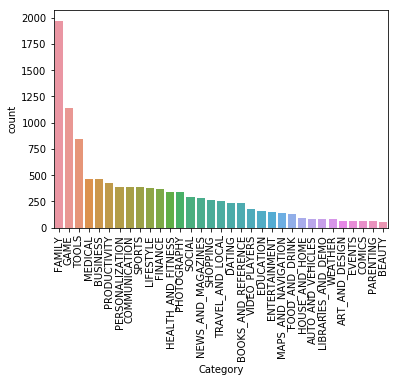

In [14]:
sns.countplot('Category',data=df,order=df['Category'].value_counts().index)
plt.xticks(rotation= 'vertical')
plt.show()

Count of apps in the playstore are ordered as:
- Family
- Game
- Tools
- Medical
- Busuness
- and so on..
- we will deep dive later into these after Data Cleaning

In [15]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

### Type

In [16]:
df[df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [17]:
df['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [18]:
#Assuming that if price is 0 then the type should be Free. I'd rename the type for this entry to Free
#df[['Price','Type']]

In [19]:
df['Type'][9148]='Free'

In [20]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

### Cleaning Data Types- Review

In [21]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [22]:
#converting reviews into integer
df['Reviews']=df['Reviews'].astype('int')

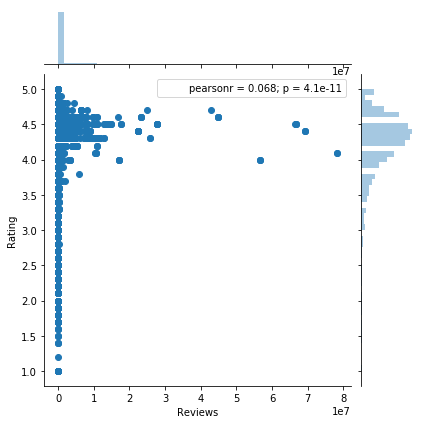

In [23]:
sns.jointplot('Reviews','Rating',data=df)

### Installs

In [24]:
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [25]:
#removing the commas and + from installs
df['Installs']=df['Installs'].str.replace('+','')
df['Installs']=df['Installs'].str.replace(',','')

In [26]:
#converting object into integer
df['Installs']=df['Installs'].astype(int)

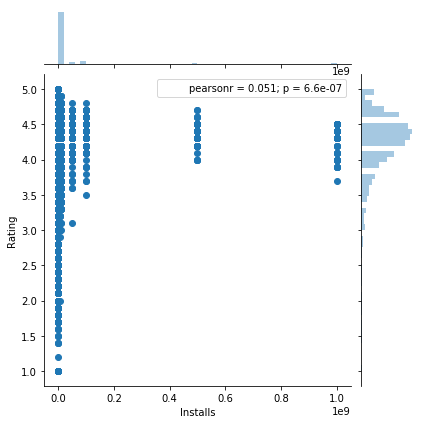

In [27]:
sns.jointplot('Installs','Rating',data=df)

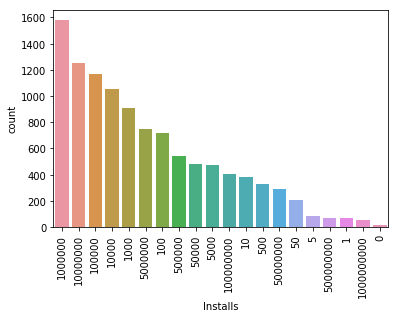

In [28]:
sns.countplot('Installs',data=df, order=df['Installs'].value_counts().index)
plt.xticks(rotation= 'vertical')
plt.show()

### Price

In [29]:
df['Price$']=df['Price'].str.replace('$','').astype('float')

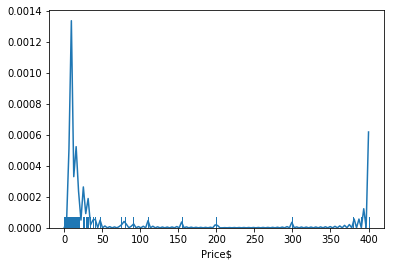

In [30]:
sns.distplot(df['Price$'],kde=True,hist=False,rug=True)
#Rug plot is analogous to a histogram with zero-width bins, or a one-dimensional scatter plot. 

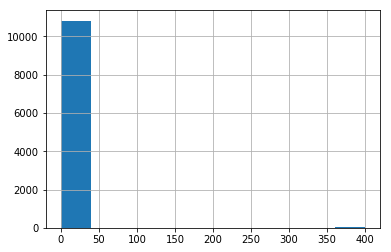

In [31]:
df['Price$'].hist()
#Few apps are extremely expensive which is kind of odd, will have to look moew into it

In [32]:
#number of categories and genres
print(df['Category'].nunique(), df['Genres'].nunique())
#currently we are keeping both

33 119


### Cleaning the size column
- Uniform Units in KiloBytes
- Varies with device being changed to category wise mean

In [33]:
#df['Size'].str.replace('M','') - Cannot do this because then won't be able to bring uniformity to data
df['SizeM']=df[df['Size'].str.contains('M')]['Size'].str.replace('M','').astype(float)*1000 #changing in kilobytes

In [34]:
df['SizeM'].fillna(df['Size'],inplace=True)

In [35]:
df['Sizek']=df['SizeM'].str.replace('k','')

In [36]:
df['Sizek'].fillna(df['SizeM'],inplace=True)

In [37]:
df['Sizek']=pd.to_numeric(df['Sizek'], errors='coerce') 
#change the size column to numeric and varies with device would change to null values

In [38]:
#Assuming that majorly apps in the same category would lie in similar size (mb) range
df['Sizek']=df.groupby('Category')['Sizek'].transform(lambda x: x.fillna(x.mean())) #fill null values with category wise mean 

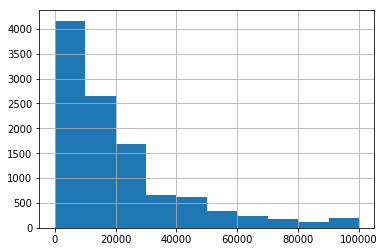

In [39]:
df['Sizek'].hist() 

In [40]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Price$               0
SizeM                0
Sizek                0
dtype: int64

### Last Updated

In [41]:
#Last Updated Format Changed
df['Last Updated']=pd.to_datetime(df['Last Updated'],infer_datetime_format=True)

### Working on Current Version and Android Version

In [42]:
df.groupby(df['Last Updated'].dt.year)['Android Ver'].size()

Last Updated
2010       1
2011      15
2012      26
2013     110
2014     209
2015     459
2016     804
2017    1867
2018    7349
Name: Android Ver, dtype: int64

In [43]:
df['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
7.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [44]:
#renaming 4.4W and up to cleaner version
df['Android Ver']=df['Android Ver'].str.replace('4.4W and up','4.4 and up')

In [45]:
yrtover=pd.crosstab(index=df['Last Updated'].dt.year, columns=df['Android Ver'])

In [46]:
pd.set_option('max_columns', 100)

In [47]:
yrtover.head(10)

Android Ver,1.0 and up,1.5 and up,1.6 and up,2.0 and up,2.0.1 and up,2.1 and up,2.2 - 7.1.1,2.2 and up,2.3 and up,2.3.3 and up,3.0 and up,3.1 and up,3.2 and up,4.0 and up,4.0.3 - 7.1.1,4.0.3 and up,4.1 - 7.1.1,4.1 and up,4.2 and up,4.3 and up,4.4 and up,5.0 - 6.0,5.0 - 7.1.1,5.0 - 8.0,5.0 and up,5.1 and up,6.0 and up,7.0 - 7.1.1,7.0 and up,7.1 and up,8.0 and up,Varies with device
Last Updated,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011,0,1,7,1,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2012,0,1,1,2,1,13,0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2013,0,3,11,3,3,27,0,39,7,4,5,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
2014,1,3,12,6,2,22,0,47,38,15,11,1,0,20,0,9,0,9,4,1,1,0,0,0,0,0,0,0,0,0,0,7
2015,0,3,26,3,0,10,0,50,88,53,53,2,4,70,0,32,0,19,7,7,2,0,0,0,13,2,0,0,0,0,0,15
2016,0,4,9,9,0,12,0,35,124,85,39,3,10,166,0,102,0,78,19,13,37,1,0,0,10,0,2,0,0,0,0,46
2017,0,3,40,3,0,17,1,44,210,64,70,2,10,322,0,312,1,401,64,42,114,0,0,1,31,4,11,0,3,1,0,96
2018,1,1,10,5,1,27,0,24,185,59,62,0,11,797,2,1046,0,1944,300,180,838,0,1,1,547,18,47,1,39,2,6,1192


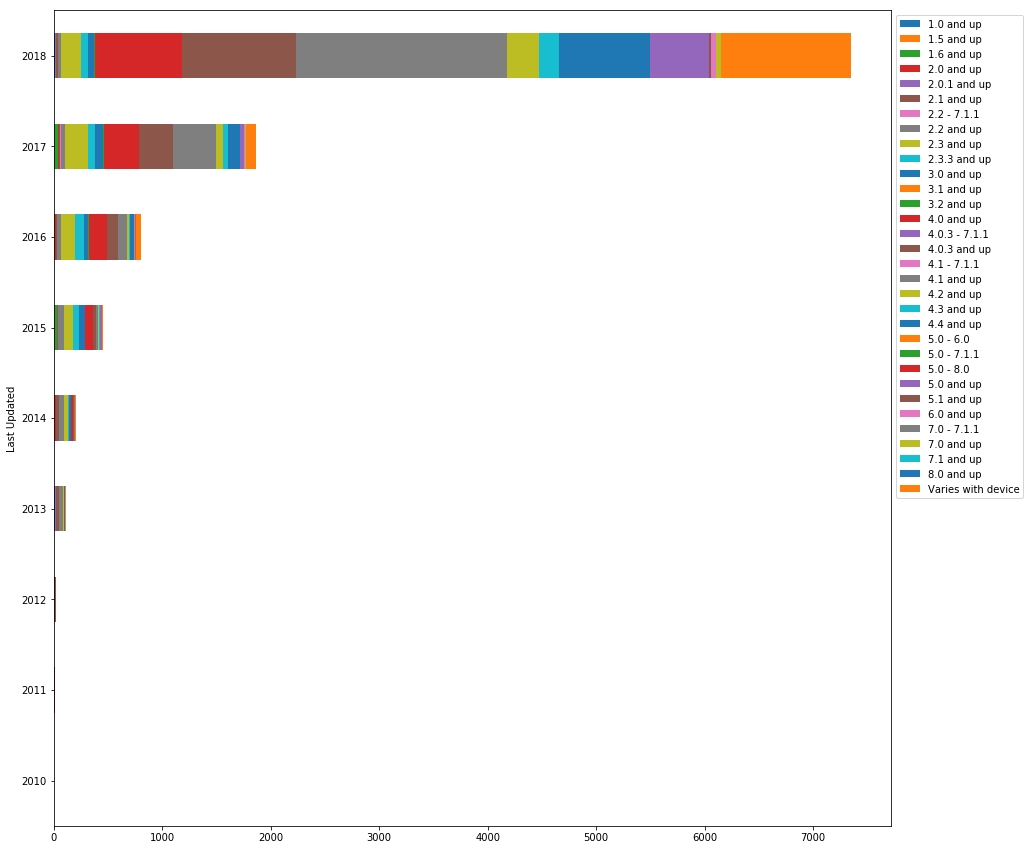

In [48]:
yrtover.plot(kind="barh", figsize=(15,15),stacked=True)
plt.legend(bbox_to_anchor=(1.0,1.0))

In [49]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price$,SizeM,Sizek
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,1000,Paid,$1.49,Everyone,Personalization,2018-07-20,4.4,NaN,1.49,11000,11000.0
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,10000,Free,0,Everyone,Personalization,2018-03-27,1.1,NaN,0.00,2100,2100.0


### Taking a look at the above insights-
- I can deduce that the two apps would've Android requirment of 4.0 and up
- All the apps updated in 2018 majorly fell into the category
- However, it is kind of difficult to solve the Version problem because that'd mean taking all lot of Assumptions
- These assumptions would be true for rows which say Varies with device. However, the above insights can be used to drive those assumptions

### Rating
- My assumption would be that number of installs would be a good correlation for rating. However the plot below shows that thought higher installs lead to higher rating but lower number of installs may have higer rating too
- Eventually for my EDA i'd drop the na values for rating

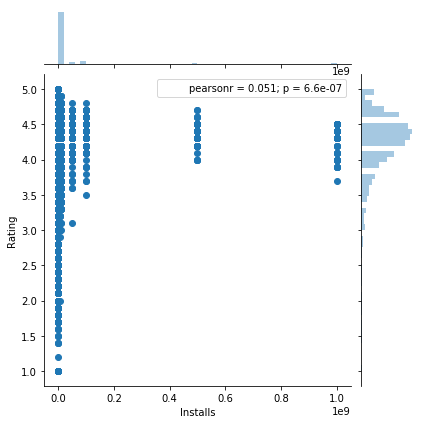

In [50]:
sns.jointplot('Installs','Rating',data=df)

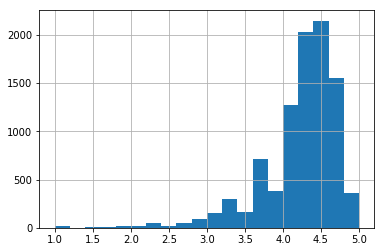

In [51]:
df['Rating'].hist(bins=20)

In [52]:
df.dropna(inplace=True)

In [53]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Price$            0
SizeM             0
Sizek             0
dtype: int64

### More Exploratory Data Analysis

In [54]:
columns_to_use=['Category','Rating','Reviews','Sizek','Installs','Type','Price$','Content Rating','Genres','Last Updated']
#Currently for EDA these would provide more value to understand the rating of an app
#These features may have a better correlation with rating
#This hypothesis can be confirmed through EDA

In [55]:
new_df=df[columns_to_use]

In [56]:
new_df.head(4)

,Category,Rating,Reviews,Sizek,Installs,Type,Price$,Content Rating,Genres,Last Updated
0,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07
1,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
3,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08


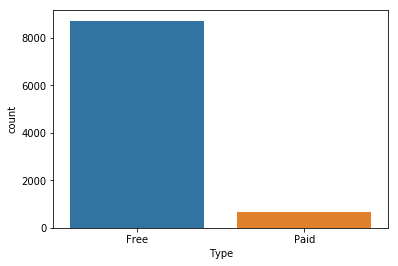

In [57]:
sns.countplot('Type',data=new_df)

In [58]:
new_df['Content Rating'].value_counts()

Everyone           7414
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

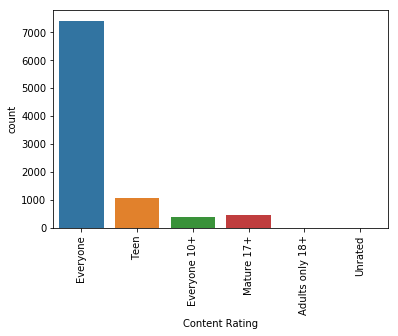

In [59]:
sns.countplot('Content Rating',data=new_df)
plt.xticks(rotation= 'vertical')
plt.show()

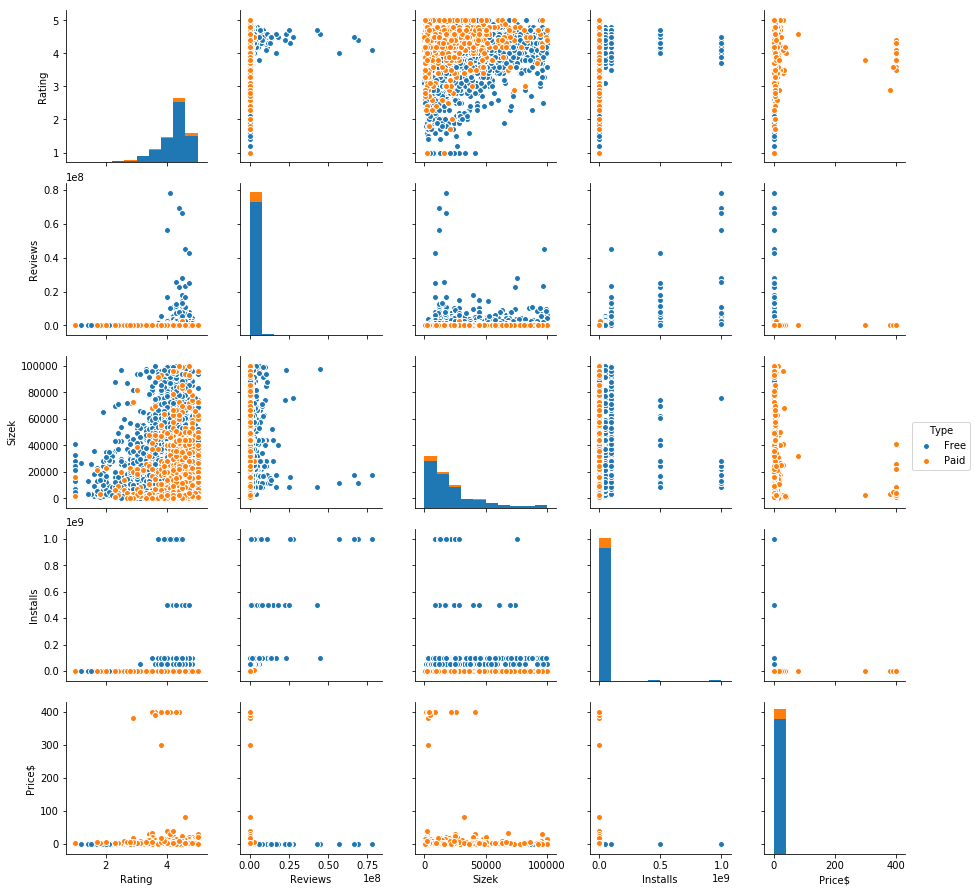

In [60]:
sns.pairplot(data=new_df,hue='Type')

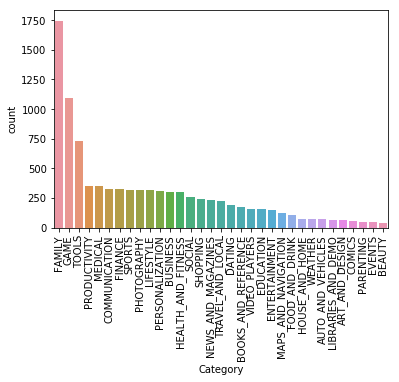

In [61]:
sns.countplot('Category',data=new_df,order=new_df['Category'].value_counts().index)
plt.xticks(rotation= 'vertical')
plt.show()

#### Let's compare the top 5 categories on different parameters

In [62]:
top5=new_df[new_df['Category'].isin(['FAMILY','GAME','TOOLS','PRODUCTIVITY','MEDICAL'])]

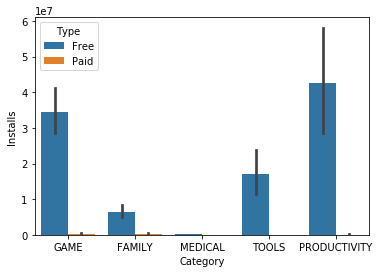

In [63]:
sns.barplot('Category','Installs',hue='Type',data=top5)

- This shows that even though Family has large number of applications, but the number of installations for productivity and game is more
Let's look at all the installations category wise

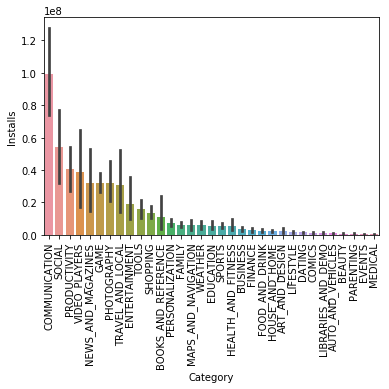

In [64]:
sns.barplot('Category','Installs',data=new_df,order=new_df.groupby('Category')['Installs'].mean().sort_values(ascending=False).index)
plt.xticks(rotation= 'vertical')
plt.show()

The order for **mean** number of installations is:

- Communication
- Social
- Prodcutivity
- Video Players
- News & Magazine
- Game

The order for installations calculated below:

- Game
- Communication
- Productivity
- Social
- Tools

In [65]:
pd.pivot_table(data=new_df, index='Category',values='Installs',aggfunc=np.sum,).sort_values(by='Installs',ascending=False)

,Installs
Category,
GAME,3.508586e+10
COMMUNICATION,3.264724e+10
PRODUCTIVITY,1.417607e+10
SOCIAL,1.406984e+10
TOOLS,1.145022e+10
FAMILY,1.025765e+10
PHOTOGRAPHY,1.008824e+10
NEWS_AND_MAGAZINES,7.496211e+09
TRAVEL_AND_LOCAL,6.868859e+09


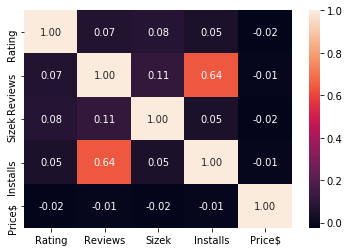

In [66]:
#Finally Looking at the correlation
sns.heatmap(new_df.corr(),annot=True,fmt='0.2f')

Installs and Reviews seem very correlated 

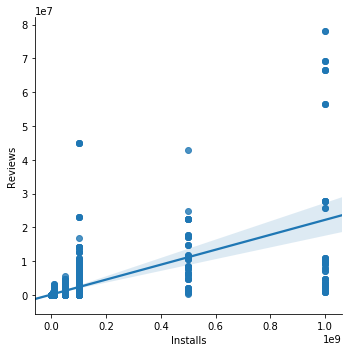

In [67]:
sns.lmplot('Installs','Reviews',data=new_df,x_jitter=True)
#Though installs is a numerical variable it seems more appropriate to plot it as categorical

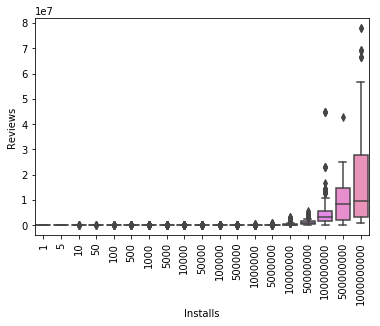

In [68]:
sns.boxplot('Installs','Reviews',data=new_df)
plt.xticks(rotation='vertical')
plt.show()

This plot definitely shows that increase in number of installations means more reviews which naturally makes sense because as the number of people using the app increases the reviews would also increase 